In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
#We do not want to see warnings
warnings.filterwarnings("ignore") 

In [2]:
#import data
data = pd.read_csv("uber.csv")

In [3]:
#Create a data copy
df = data.copy()

In [4]:
#Print data
df.head

<bound method NDFrame.head of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC      

In [5]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
#pickup_datetime is not in required data format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [8]:
#Statistics of data
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
#Number of missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [30]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation on the numeric columns only
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000    -0.000223         -0.000266         0.000061   
fare_amount         -0.000223     1.000000          0.004654        -0.003154   
pickup_longitude    -0.000266     0.004654          1.000000        -0.806902   
pickup_latitude      0.000061    -0.003154         -0.806902         1.000000   
dropoff_longitude   -0.000310     0.003021          0.830658        -0.770049   
dropoff_latitude     0.000938    -0.004621         -0.844705         0.691893   
passenger_count      0.002311     0.010705         -0.000644        -0.001441   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                 -0.000310          0.000938         0.002311  
fare_amount                 0.003021         -0.004621         0.010705  
pickup_longitude            0.830658         -0.844705        -0.000644  
pickup_latitude            -0.770049          0.691893 

In [11]:
#Drop the rows with missing values
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d696b6a0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d696b69640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d697fb7f20>],
 'medians': [<matplotlib.lines.Line2D at 0x2d697f14bf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d697fb8500>],
 'means': []}

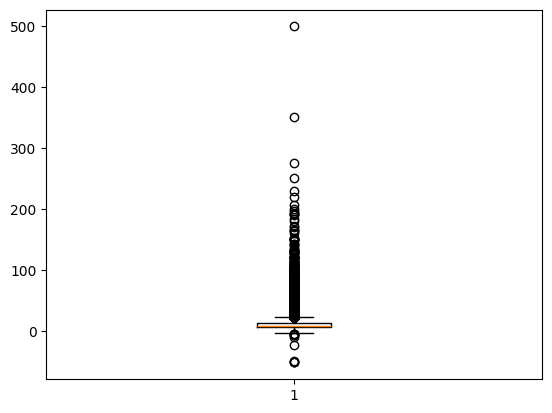

In [12]:
plt.boxplot(df['fare_amount'])

In [15]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2d69859dc40>,
 'caps': [<matplotlib.lines.Line2D at 0x2d69859e0f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d69859d9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d69859e720>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d69859ea20>],
 'means': []}

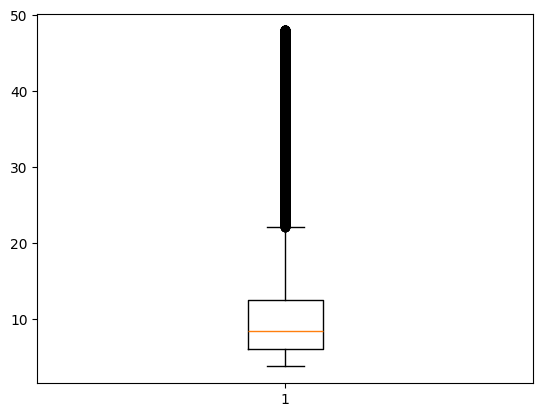

In [16]:
plt.boxplot(df['fare_amount'])

In [17]:
#Check the missing values now
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:
#Time to apply learning models
from sklearn.model_selection import train_test_split

In [19]:
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']


In [20]:
#Necessary to apply model
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [24]:
#Prediction
predict = lrmodel.predict(x_test)

In [43]:
#Check Error
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)

lrmodel_r2 = r2_score(y_test, predict)
print("R² score for the model is ", lrmodel_r2)

RMSE error for the model is  7.083585521002763
R² score for the model is  -0.00015874177771135756


In [45]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

In [50]:
#Fit the Forest
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)

In [51]:
#Errors for the forest
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)

rfrmodel_r2 = r2_score(y_test, rfrmodel_pred)
print("R^2 Score for Random Forest is:", rfrmodel_r2)

RMSE value for Random Forest is: 8.565996490346976
R^2 Score for Random Forest is: -0.4625759787557846
